# Customer Segmentation System

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
plt.style.use('seaborn-v0_8')
%matplotlib inline

## Load Data

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")

Dataset loaded successfully!
Dataset shape: (200, 5)

First 5 rows:


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Cleaning & Preprocessing

In [5]:
# Data Cleaning & Preprocessing
def preprocess_data(df):
    print("=== DATA CLEANING & PREPROCESSING ===")
    
    # Check for missing values
    print("\n1. Missing Values:")
    print(df.isnull().sum())
    
    # Check for duplicates
    print(f"\n2. Duplicate rows: {df.duplicated().sum()}")
    
    # Data types and basic info
    print("\n3. Data Types:")
    print(df.info())
    
    # Statistical summary
    print("\n4. Statistical Summary:")
    print(df.describe())
    
    # Handle categorical variables
    le = LabelEncoder()
    df_processed = df.copy()
    df_processed['Gender_encoded'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0
    
    # Feature scaling
    features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    scaler = StandardScaler()
    df_scaled = df_processed.copy()
    df_scaled[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])
    
    print("\n5. Preprocessing completed!")
    print(f"Original data shape: {df.shape}")
    print(f"Processed data shape: {df_processed.shape}")
    
    return df_processed, df_scaled, scaler

# Apply preprocessing
df_original, df_scaled, scaler = preprocess_data(df)
print("\nFirst 5 rows of processed data:")
df_original.head()

=== DATA CLEANING & PREPROCESSING ===

1. Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

2. Duplicate rows: 0

3. Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

4. Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000      

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Exploratory Data Analysis (EDA)

=== EXPLORATORY DATA ANALYSIS ===


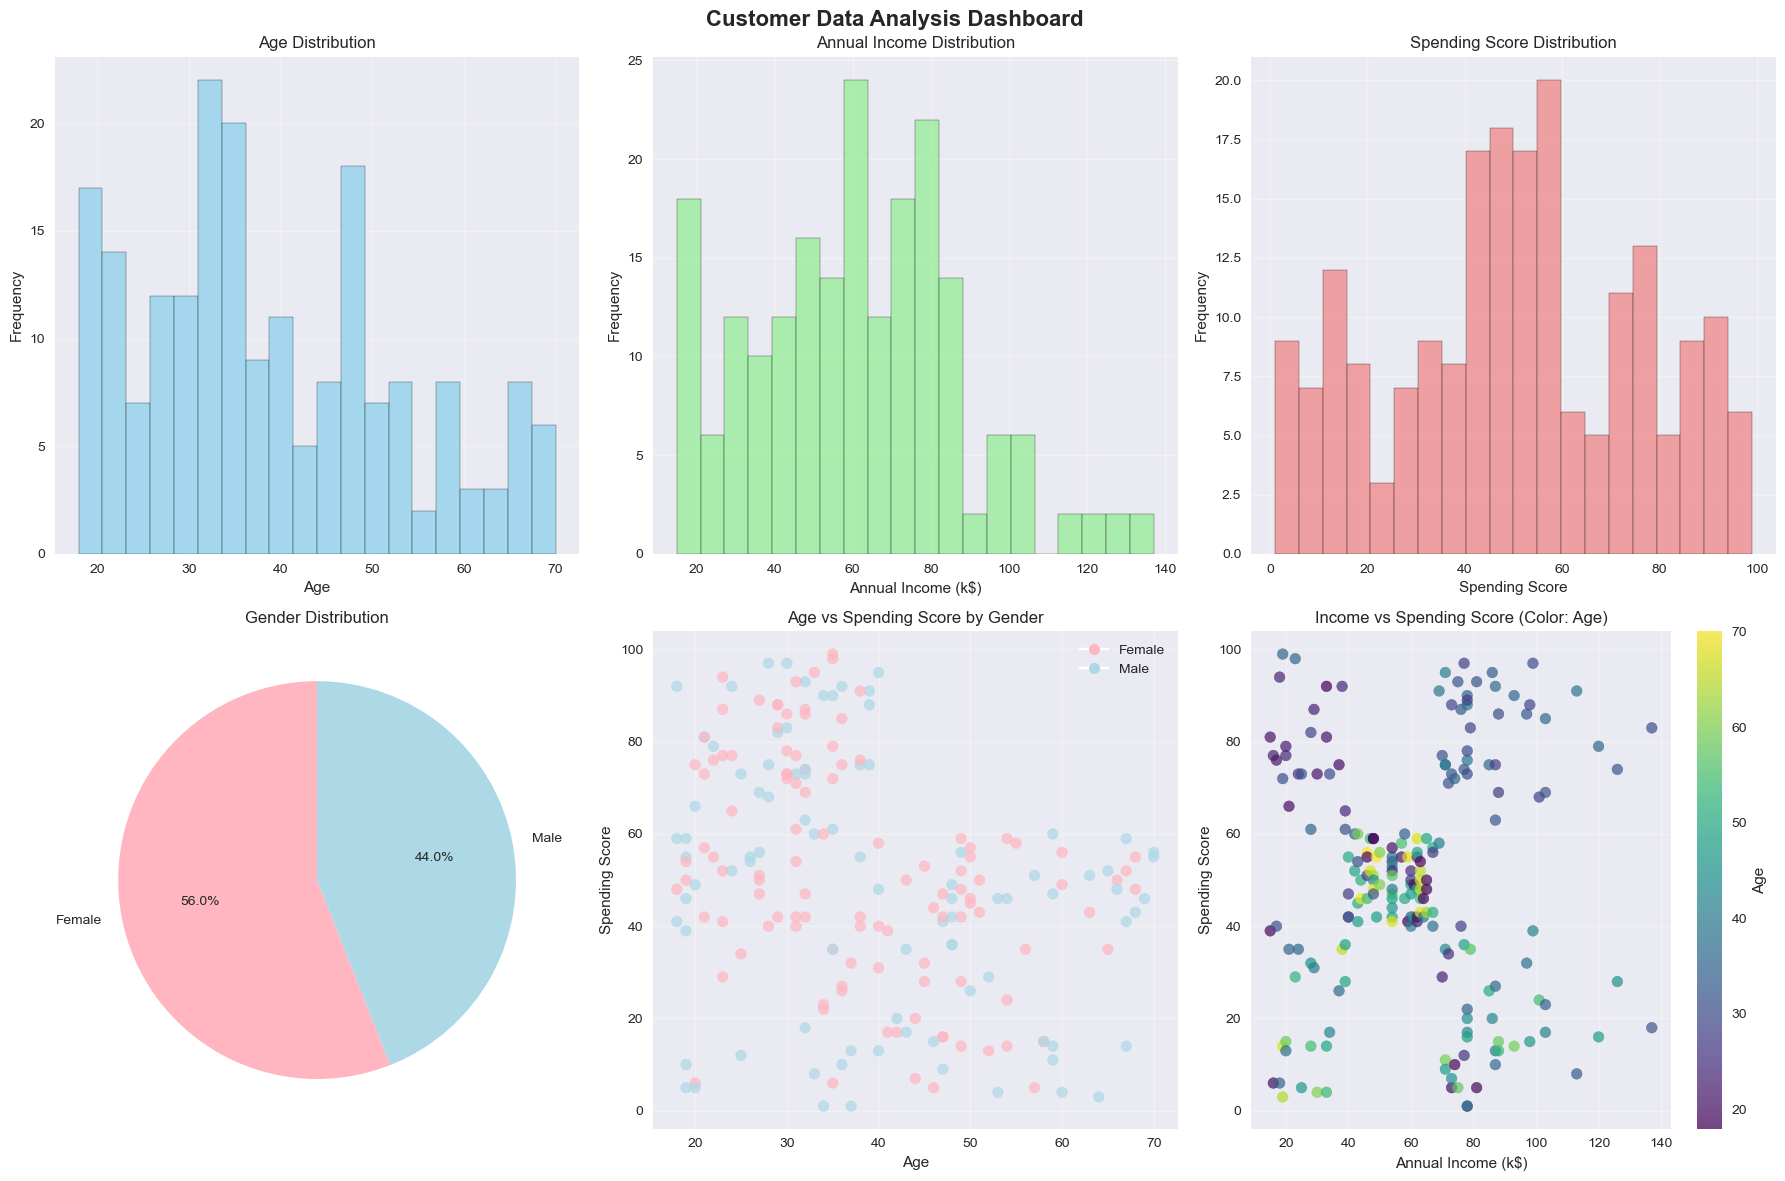

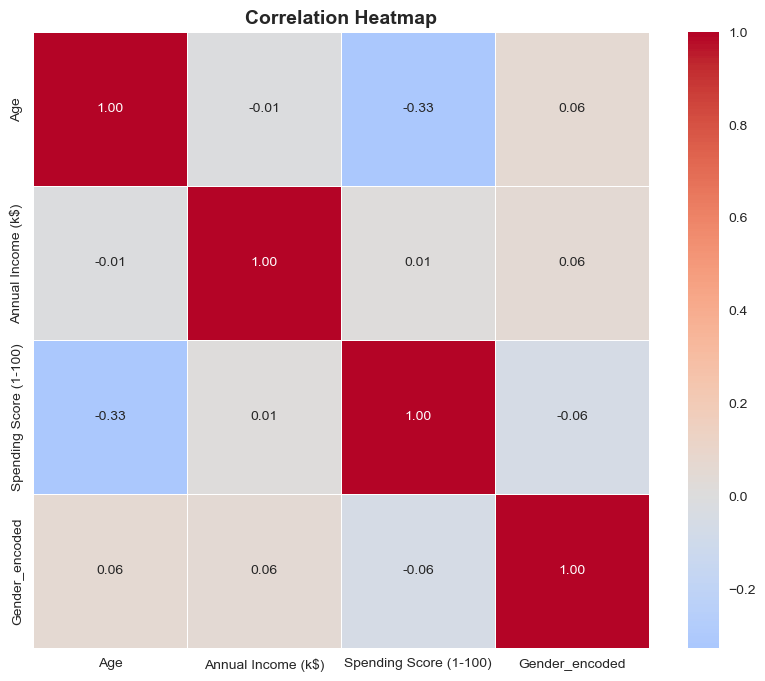


Key Insights:
• Average Age: 38.9 years
• Average Annual Income: $60.6k
• Average Spending Score: 50.2/100
• Gender Ratio: 56.0% Female, 44.0% Male


In [6]:
# Exploratory Data Analysis
def perform_eda(df):
    print("=== EXPLORATORY DATA ANALYSIS ===")
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Customer Data Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Age Distribution
    axes[0,0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0,0].set_title('Age Distribution')
    axes[0,0].set_xlabel('Age')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Annual Income Distribution
    axes[0,1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0,1].set_title('Annual Income Distribution')
    axes[0,1].set_xlabel('Annual Income (k$)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Spending Score Distribution
    axes[0,2].hist(df['Spending Score (1-100)'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0,2].set_title('Spending Score Distribution')
    axes[0,2].set_xlabel('Spending Score')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Gender Distribution
    gender_counts = df['Gender'].value_counts()
    axes[1,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
                  colors=['lightpink', 'lightblue'], startangle=90)
    axes[1,0].set_title('Gender Distribution')
    
    # 5. Age vs Spending Score by Gender
    colors = ['lightpink' if g == 'Female' else 'lightblue' for g in df['Gender']]
    scatter = axes[1,1].scatter(df['Age'], df['Spending Score (1-100)'], c=colors, alpha=0.7, s=60)
    axes[1,1].set_title('Age vs Spending Score by Gender')
    axes[1,1].set_xlabel('Age')
    axes[1,1].set_ylabel('Spending Score')
    axes[1,1].grid(True, alpha=0.3)
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightpink', markersize=8, label='Female'),
                      Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=8, label='Male')]
    axes[1,1].legend(handles=legend_elements)
    
    # 6. Income vs Spending Score
    scatter = axes[1,2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                               c=df['Age'], alpha=0.7, s=60, cmap='viridis')
    axes[1,2].set_title('Income vs Spending Score (Color: Age)')
    axes[1,2].set_xlabel('Annual Income (k$)')
    axes[1,2].set_ylabel('Spending Score')
    axes[1,2].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1,2], label='Age')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']]
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
                square=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.show()
    
    # Additional insights
    print("\nKey Insights:")
    print(f"• Average Age: {df['Age'].mean():.1f} years")
    print(f"• Average Annual Income: ${df['Annual Income (k$)'].mean():.1f}k")
    print(f"• Average Spending Score: {df['Spending Score (1-100)'].mean():.1f}/100")
    print(f"• Gender Ratio: {gender_counts['Female']/len(df)*100:.1f}% Female, {gender_counts['Male']/len(df)*100:.1f}% Male")

# Perform EDA
perform_eda(df_original)

## Feature Engineering

In [7]:
# Feature Engineering
def feature_engineering(df):
    print("=== FEATURE ENGINEERING ===")
    
    df_engineered = df.copy()
    
    # 1. Age Groups
    df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], 
                                      bins=[0, 25, 35, 45, 55, 100], 
                                      labels=['Young (0-25)', 'Young Adult (26-35)', 
                                              'Middle Age (36-45)', 'Senior (46-55)', 
                                              'Elderly (55+)'])
    
    # 2. Income Groups
    df_engineered['Income_Group'] = pd.cut(df_engineered['Annual Income (k$)'], 
                                         bins=[0, 40, 70, 100, 150], 
                                         labels=['Low (<40k)', 'Medium (40-70k)', 
                                                 'High (70-100k)', 'Very High (>100k)'])
    
    # 3. Spending Behavior Groups
    df_engineered['Spending_Group'] = pd.cut(df_engineered['Spending Score (1-100)'], 
                                           bins=[0, 33, 66, 100], 
                                           labels=['Low Spender', 'Medium Spender', 'High Spender'])
    
    # 4. Customer Value Score (Business potential)
    df_engineered['Customer_Value'] = (df_engineered['Annual Income (k$)'] * df_engineered['Spending Score (1-100)']) / 100
    
    # 5. Spending to Income Ratio
    df_engineered['Spending_Income_Ratio'] = df_engineered['Spending Score (1-100)'] / df_engineered['Annual Income (k$)']
    
    print("New features created:")
    new_features = ['Age_Group', 'Income_Group', 'Spending_Group', 'Customer_Value', 'Spending_Income_Ratio']
    for feature in new_features:
        print(f"• {feature}")
    
    print(f"\nFirst 5 rows with engineered features:")
    display(df_engineered[['Age', 'Age_Group', 'Annual Income (k$)', 'Income_Group', 
                          'Spending Score (1-100)', 'Spending_Group', 'Customer_Value']].head())
    
    return df_engineered

# Apply feature engineering
df_engineered = feature_engineering(df_original)

=== FEATURE ENGINEERING ===
New features created:
• Age_Group
• Income_Group
• Spending_Group
• Customer_Value
• Spending_Income_Ratio

First 5 rows with engineered features:


,Age,Age_Group,Annual Income (k$),Income_Group,Spending Score (1-100),Spending_Group,Customer_Value
0,19,Young (0-25),15,Low (<40k),39,Medium Spender,5.85
1,21,Young (0-25),15,Low (<40k),81,High Spender,12.15
2,20,Young (0-25),16,Low (<40k),6,Low Spender,0.96
3,23,Young (0-25),16,Low (<40k),77,High Spender,12.32
4,31,Young Adult (26-35),17,Low (<40k),40,Medium Spender,6.80


## Clustering Algorithms - Finding Optimal Clusters

=== CLUSTERING ANALYSIS ===
Finding optimal number of clusters...


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


K=2: WCSS = 269.69, Silhouette Score = 0.321
K=3: WCSS = 157.70, Silhouette Score = 0.467
K=4: WCSS = 108.92, Silhouette Score = 0.494
K=5: WCSS = 65.57, Silhouette Score = 0.555
K=6: WCSS = 55.06, Silhouette Score = 0.540
K=7: WCSS = 44.86, Silhouette Score = 0.528
K=8: WCSS = 37.23, Silhouette Score = 0.455
K=9: WCSS = 32.39, Silhouette Score = 0.457
K=10: WCSS = 29.98, Silhouette Score = 0.443


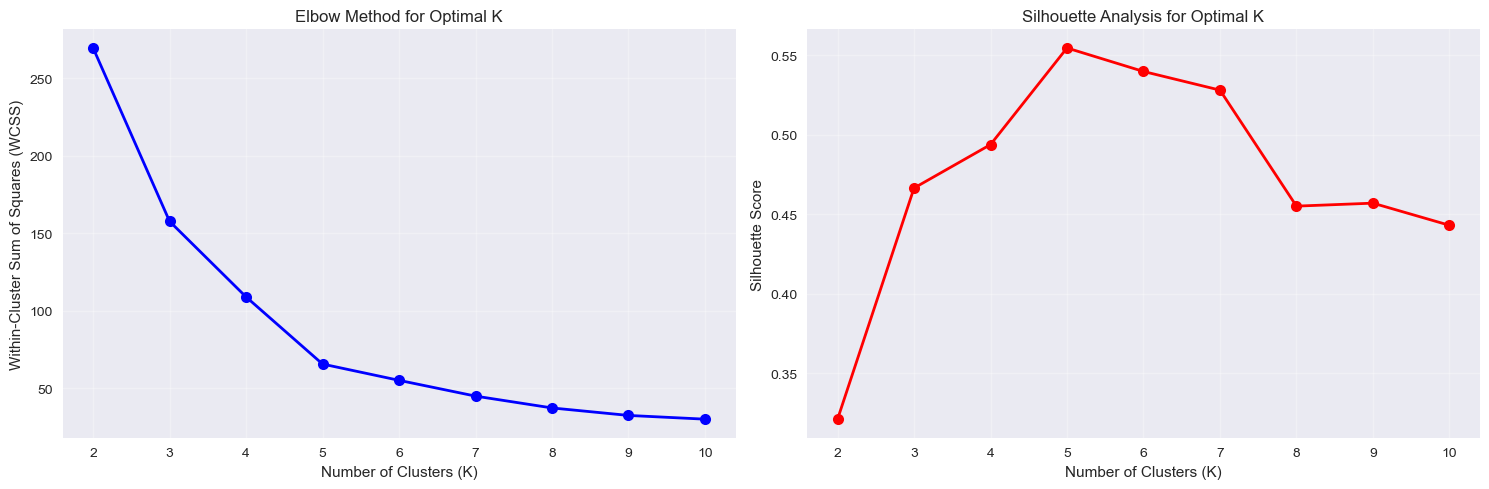


✅ Optimal number of clusters: 5 (based on highest silhouette score)

Applying K-means clustering with 5 clusters...
✅ K-means clustering completed!
• Number of clusters: 5
• Silhouette Score: 0.555


In [8]:
# Clustering Analysis - Finding Optimal Number of Clusters
print("=== CLUSTERING ANALYSIS ===")

class CustomerSegmentation:
    def __init__(self, df):
        self.df = df
        self.models = {}
        self.labels = {}
        
    def find_optimal_clusters(self, features, max_k=10):
        """Find optimal number of clusters using Elbow method and Silhouette score"""
        print("Finding optimal number of clusters...")
        
        wcss = []  # Within-Cluster Sum of Square
        silhouette_scores = []
        k_range = range(2, max_k + 1)
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(features)
            wcss.append(kmeans.inertia_)
            
            # Calculate silhouette score
            if k > 1:
                score = silhouette_score(features, kmeans.labels_)
                silhouette_scores.append(score)
                print(f"K={k}: WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.3f}")
        
        # Plot results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Elbow curve
        ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
        ax1.set_xlabel('Number of Clusters (K)')
        ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
        ax1.set_title('Elbow Method for Optimal K')
        ax1.grid(True, alpha=0.3)
        
        # Silhouette scores
        ax2.plot(range(2, max_k + 1), silhouette_scores, 'ro-', linewidth=2, markersize=8)
        ax2.set_xlabel('Number of Clusters (K)')
        ax2.set_ylabel('Silhouette Score')
        ax2.set_title('Silhouette Analysis for Optimal K')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Find optimal K (highest silhouette score)
        optimal_k = range(2, max_k + 1)[np.argmax(silhouette_scores)]
        print(f"\n✅ Optimal number of clusters: {optimal_k} (based on highest silhouette score)")
        
        return optimal_k
    
    def apply_kmeans(self, features, n_clusters=5):
        """Apply K-means clustering with specified number of clusters"""
        print(f"\nApplying K-means clustering with {n_clusters} clusters...")
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(features)
        self.models['kmeans'] = kmeans
        self.labels['kmeans'] = labels
        
        score = silhouette_score(features, labels)
        print(f"✅ K-means clustering completed!")
        print(f"• Number of clusters: {n_clusters}")
        print(f"• Silhouette Score: {score:.3f}")
        
        return labels

# Initialize segmentation
segmentation = CustomerSegmentation(df_scaled)

# Use income and spending score for clustering (most common approach)
features = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]

# Find optimal clusters
optimal_k = segmentation.find_optimal_clusters(features)

# Apply K-means with optimal clusters
kmeans_labels = segmentation.apply_kmeans(features, optimal_k)

## Apply Clustering and Analyze Results

In [9]:
# Apply clustering and analyze results
def analyze_clusters(df, labels, algorithm_name):
    """Analyze and describe clusters"""
    print(f"\n=== {algorithm_name.upper()} CLUSTER ANALYSIS ===")
    
    df_clustered = df.copy()
    df_clustered['Cluster'] = labels
    
    # Cluster profiles
    cluster_profile = df_clustered.groupby('Cluster').agg({
        'Age': ['mean', 'std', 'min', 'max'],
        'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
        'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
        'Gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'CustomerID': 'count',
        'Customer_Value': 'mean'
    }).round(2)
    
    # Flatten column names
    cluster_profile.columns = ['_'.join(col).strip() for col in cluster_profile.columns.values]
    cluster_profile = cluster_profile.rename(columns={
        'CustomerID_count': 'Count', 
        'Gender_<lambda>': 'Dominant_Gender',
        'Customer_Value_mean': 'Avg_Customer_Value'
    })
    
    # Calculate percentage
    cluster_profile['Percentage'] = (cluster_profile['Count'] / len(df_clustered) * 100).round(1)
    
    print("Cluster Profiles:")
    display(cluster_profile)
    
    return df_clustered

# Apply clustering analysis
df_kmeans = analyze_clusters(df_engineered, kmeans_labels, "K-means")

print("\nFirst 10 customers with their clusters:")
display(df_kmeans[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))


=== K-MEANS CLUSTER ANALYSIS ===
Cluster Profiles:


,Age_mean,Age_std,Age_min,Age_max,Annual Income (k$)_mean,Annual Income (k$)_std,Annual Income (k$)_min,Annual Income (k$)_max,Spending Score (1-100)_mean,Spending Score (1-100)_std,Spending Score (1-100)_min,Spending Score (1-100)_max,Dominant_Gender,Count,Avg_Customer_Value,Percentage
Cluster,,,,,,,,,,,,,,,,
0,42.72,16.45,18,70,55.30,8.99,39,76,49.52,6.53,34,61,Female,81,27.23,40.5
1,32.69,3.73,27,40,86.54,16.31,69,137,82.13,9.36,63,97,Female,39,71.01,19.5
2,25.27,5.26,18,35,25.73,7.57,15,39,79.36,10.50,61,99,Female,22,20.33,11.0
3,41.11,11.34,19,59,88.20,16.40,70,137,17.11,9.95,1,39,Male,35,15.47,17.5
4,45.22,13.23,19,67,26.30,7.89,15,39,20.91,13.02,3,40,Female,23,5.65,11.5



First 10 customers with their clusters:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


## Comprehensive Dashboard & Visualization

=== CUSTOMER SEGMENTATION DASHBOARD ===


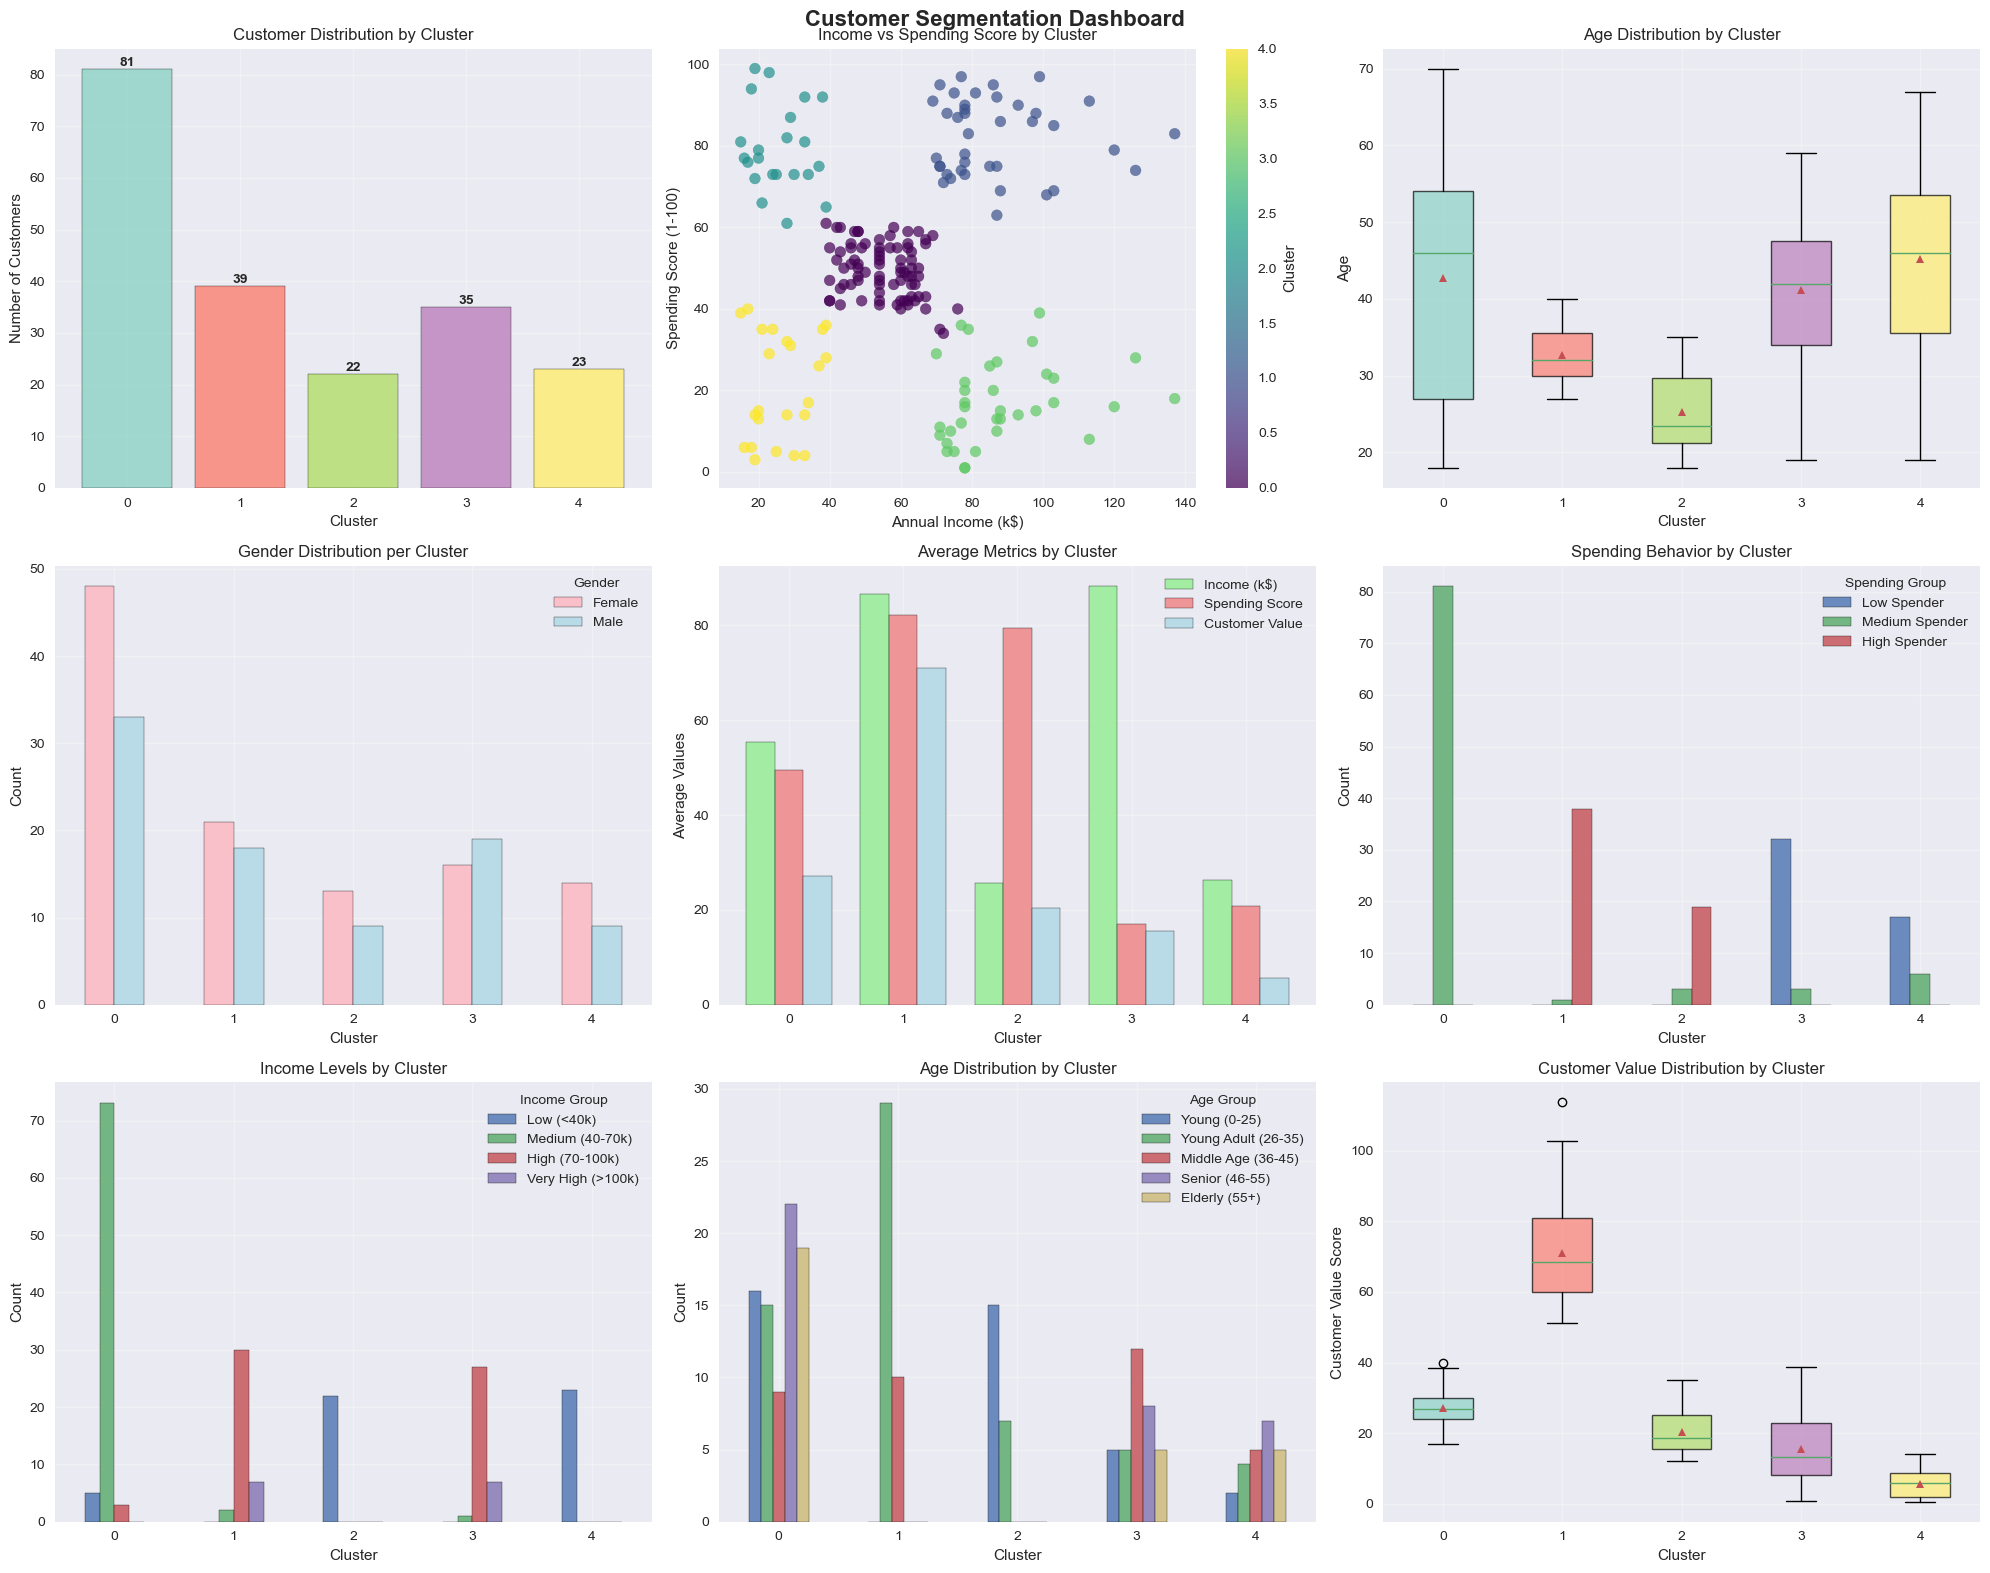

In [10]:
# Comprehensive Dashboard & Visualization
def create_dashboard(df_clustered):
    print("=== CUSTOMER SEGMENTATION DASHBOARD ===")
    
    # Create a comprehensive dashboard
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Customer Segmentation Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Cluster Distribution
    ax1 = plt.subplot(3, 3, 1)
    cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
    colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
    bars = ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black', alpha=0.8)
    ax1.set_xlabel('Cluster')
    ax1.set_ylabel('Number of Customers')
    ax1.set_title('Customer Distribution by Cluster')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Income vs Spending Score by Cluster
    ax2 = plt.subplot(3, 3, 2)
    scatter = ax2.scatter(df_clustered['Annual Income (k$)'], 
                         df_clustered['Spending Score (1-100)'],
                         c=df_clustered['Cluster'], cmap='viridis', alpha=0.7, s=60)
    ax2.set_xlabel('Annual Income (k$)')
    ax2.set_ylabel('Spending Score (1-100)')
    ax2.set_title('Income vs Spending Score by Cluster')
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax2, label='Cluster')
    
    # 3. Age Distribution by Cluster
    ax3 = plt.subplot(3, 3, 3)
    box_data = [df_clustered[df_clustered['Cluster'] == cluster]['Age'] 
                for cluster in sorted(df_clustered['Cluster'].unique())]
    box_plot = ax3.boxplot(box_data, labels=sorted(df_clustered['Cluster'].unique()), 
                          patch_artist=True, showmeans=True)
    
    # Color the boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(box_data)))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax3.set_xlabel('Cluster')
    ax3.set_ylabel('Age')
    ax3.set_title('Age Distribution by Cluster')
    ax3.grid(True, alpha=0.3)
    
    # 4. Gender Distribution per Cluster
    ax4 = plt.subplot(3, 3, 4)
    gender_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Gender'])
    gender_cluster.plot(kind='bar', ax=ax4, color=['lightpink', 'lightblue'], 
                       edgecolor='black', alpha=0.8)
    ax4.set_xlabel('Cluster')
    ax4.set_ylabel('Count')
    ax4.set_title('Gender Distribution per Cluster')
    ax4.legend(title='Gender')
    ax4.tick_params(axis='x', rotation=0)
    ax4.grid(True, alpha=0.3)
    
    # 5. Average Metrics by Cluster
    ax5 = plt.subplot(3, 3, 5)
    cluster_means = df_clustered.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Customer_Value']].mean()
    x = np.arange(len(cluster_means))
    width = 0.25
    
    bars1 = ax5.bar(x - width, cluster_means['Annual Income (k$)'], width, 
                   label='Income (k$)', color='lightgreen', alpha=0.8, edgecolor='black')
    bars2 = ax5.bar(x, cluster_means['Spending Score (1-100)'], width, 
                   label='Spending Score', color='lightcoral', alpha=0.8, edgecolor='black')
    bars3 = ax5.bar(x + width, cluster_means['Customer_Value'], width, 
                   label='Customer Value', color='lightblue', alpha=0.8, edgecolor='black')
    
    ax5.set_xlabel('Cluster')
    ax5.set_ylabel('Average Values')
    ax5.set_title('Average Metrics by Cluster')
    ax5.set_xticks(x)
    ax5.set_xticklabels(cluster_means.index)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Spending Groups by Cluster
    ax6 = plt.subplot(3, 3, 6)
    spending_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Spending_Group'])
    spending_cluster.plot(kind='bar', ax=ax6, edgecolor='black', alpha=0.8)
    ax6.set_xlabel('Cluster')
    ax6.set_ylabel('Count')
    ax6.set_title('Spending Behavior by Cluster')
    ax6.legend(title='Spending Group')
    ax6.tick_params(axis='x', rotation=0)
    ax6.grid(True, alpha=0.3)
    
    # 7. Income Groups by Cluster
    ax7 = plt.subplot(3, 3, 7)
    income_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Income_Group'])
    income_cluster.plot(kind='bar', ax=ax7, edgecolor='black', alpha=0.8)
    ax7.set_xlabel('Cluster')
    ax7.set_ylabel('Count')
    ax7.set_title('Income Levels by Cluster')
    ax7.legend(title='Income Group')
    ax7.tick_params(axis='x', rotation=0)
    ax7.grid(True, alpha=0.3)
    
    # 8. Age Groups by Cluster
    ax8 = plt.subplot(3, 3, 8)
    age_cluster = pd.crosstab(df_clustered['Cluster'], df_clustered['Age_Group'])
    age_cluster.plot(kind='bar', ax=ax8, edgecolor='black', alpha=0.8)
    ax8.set_xlabel('Cluster')
    ax8.set_ylabel('Count')
    ax8.set_title('Age Distribution by Cluster')
    ax8.legend(title='Age Group')
    ax8.tick_params(axis='x', rotation=0)
    ax8.grid(True, alpha=0.3)
    
    # 9. Customer Value by Cluster
    ax9 = plt.subplot(3, 3, 9)
    customer_value_data = [df_clustered[df_clustered['Cluster'] == cluster]['Customer_Value'] 
                          for cluster in sorted(df_clustered['Cluster'].unique())]
    box_plot = ax9.boxplot(customer_value_data, labels=sorted(df_clustered['Cluster'].unique()), 
                          patch_artist=True, showmeans=True)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(customer_value_data)))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax9.set_xlabel('Cluster')
    ax9.set_ylabel('Customer Value Score')
    ax9.set_title('Customer Value Distribution by Cluster')
    ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the comprehensive dashboard
dashboard = create_dashboard(df_kmeans)

## Business Insights and Recommendations

In [13]:
# Business Insights and Recommendations - CORRECTED VERSION
def generate_business_insights(df_clustered):
    """Generate actionable business insights from clustering results"""
    
    print("=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===")
    print("="*70)
    
    # Create cluster profiles with proper column handling
    cluster_profiles = df_clustered.groupby('Cluster').agg({
        'Age': 'mean',
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean',
        'Gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
        'CustomerID': 'count',
        'Customer_Value': 'mean'
    }).round(2)
    
    # Rename columns for clarity
    cluster_profiles = cluster_profiles.rename(columns={
        'CustomerID': 'Count', 
        'Gender': 'Dominant_Gender'
    })
    
    insights = []
    
    for cluster in sorted(cluster_profiles.index):
        profile = cluster_profiles.loc[cluster]
        age = profile['Age']
        income = profile['Annual Income (k$)']
        spending = profile['Spending Score (1-100)']
        gender = profile['Dominant_Gender']
        value = profile['Customer_Value']
        count = profile['Count']
        percentage = (count / len(df_clustered)) * 100
        
        print(f"\n🎯 CLUSTER {cluster} - {count} customers ({percentage:.1f}% of total)")
        print(f"   📊 Profile: Average age {age:.1f}, Mostly {gender}")
        print(f"   💰 Financials: Income ${income:.1f}k, Spending Score: {spending:.1f}/100")
        print(f"   📈 Business Value Index: {value:.1f}")
        
        # Generate insights and recommendations based on cluster characteristics
        if spending > 60 and income > 70:
            segment_type = "💎 PREMIUM HIGH-SPENDERS"
            insight = "High-income customers who love to spend - Your most valuable segment"
            recommendation = """• Target with luxury products and exclusive services
• Implement VIP loyalty programs with premium benefits
• Personalize shopping experiences with dedicated account managers
• Offer early access to new collections and exclusive events"""
            
        elif spending > 60 and income <= 70:
            segment_type = "⭐ VALUE-CONSCIOUS ENTHUSIASTS"
            insight = "Moderate income but high spending enthusiasm - Great potential"
            recommendation = """• Offer good value deals and bundle packages
• Create frequent promotion campaigns and flash sales
• Focus on trendy and affordable luxury products
• Implement point-based reward systems"""
            
        elif spending <= 40 and income > 70:
            segment_type = "🏦 WEALTHY CONSERVATIVE SPENDERS"
            insight = "High income but cautious spending behavior - Need trust building"
            recommendation = """• Emphasize product quality, durability, and warranties
• Offer premium but practical and long-lasting products
• Build trust through testimonials and quality certifications
• Provide excellent after-sales service and support"""
            
        elif spending <= 40 and income <= 70:
            segment_type = "💰 BUDGET-CONSCIOUS SHOPPERS"
            insight = "Price-sensitive customers with limited spending - Focus on value"
            recommendation = """• Focus on discounts, promotions, and budget options
• Highlight value-for-money products and essential items
• Create affordable membership plans with clear benefits
• Offer flexible payment options and installment plans"""
            
        else:
            segment_type = "⚖️ BALANCED MODERATE SPENDERS"
            insight = "Average income and spending patterns - Your core customer base"
            recommendation = """• Maintain good customer relationships through regular engagement
• Offer occasional promotions and seasonal discounts
• Provide reliable service and excellent customer support
• Cross-sell complementary products and services"""
        
        print(f"   🏷️  Segment Type: {segment_type}")
        print(f"   🔍 Key Insight: {insight}")
        print(f"   🎯 Marketing Strategy:")
        for line in recommendation.split('\n'):
            print(f"      {line}")
        print("-" * 70)
        
        insights.append({
            'cluster': cluster,
            'segment_type': segment_type,
            'insight': insight,
            'recommendation': recommendation,
            'size': count,
            'percentage': percentage
        })
    
    return insights

# Generate business insights
business_insights = generate_business_insights(df_kmeans)

=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===

🎯 CLUSTER 0 - 81 customers (40.5% of total)
   📊 Profile: Average age 42.7, Mostly Female
   💰 Financials: Income $55.3k, Spending Score: 49.5/100
   📈 Business Value Index: 27.2
   🏷️  Segment Type: ⚖️ BALANCED MODERATE SPENDERS
   🔍 Key Insight: Average income and spending patterns - Your core customer base
   🎯 Marketing Strategy:
      • Maintain good customer relationships through regular engagement
      • Offer occasional promotions and seasonal discounts
      • Provide reliable service and excellent customer support
      • Cross-sell complementary products and services
----------------------------------------------------------------------

🎯 CLUSTER 1 - 39 customers (19.5% of total)
   📊 Profile: Average age 32.7, Mostly Female
   💰 Financials: Income $86.5k, Spending Score: 82.1/100
   📈 Business Value Index: 71.0
   🏷️  Segment Type: 💎 PREMIUM HIGH-SPENDERS
   🔍 Key Insight: High-income customers who love to spend - Your most v

## Final Summary and Export Results

In [14]:
# Final Summary and Export Results
print("=== FINAL SUMMARY AND RESULTS ===")
print("="*50)

# Summary statistics
total_customers = len(df_kmeans)
n_clusters = df_kmeans['Cluster'].nunique()

print(f"📊 ANALYSIS COMPLETED SUCCESSFULLY!")
print(f"• Total customers analyzed: {total_customers}")
print(f"• Number of customer segments identified: {n_clusters}")
print(f"• Average silhouette score: {silhouette_score(features, kmeans_labels):.3f}")

print(f"\n📈 CLUSTER DISTRIBUTION:")
cluster_summary = df_kmeans['Cluster'].value_counts().sort_index()
for cluster, count in cluster_summary.items():
    percentage = (count / total_customers) * 100
    print(f"   Cluster {cluster}: {count} customers ({percentage:.1f}%)")

# Save results to CSV
output_filename = 'customer_segmentation_results.csv'
df_kmeans.to_csv(output_filename, index=False)

print(f"\n💾 RESULTS EXPORTED:")
print(f"   File saved as: '{output_filename}'")
print(f"   Contains all original data plus cluster assignments and engineered features")

print(f"\n🎯 NEXT STEPS:")
print("1. Review the cluster profiles and business insights")
print("2. Develop targeted marketing strategies for each segment")
print("3. Implement personalized recommendations based on cluster characteristics")
print("4. Monitor cluster evolution over time and adjust strategies accordingly")

# Display final dataset sample
print(f"\n📋 FINAL DATASET SAMPLE (with clusters):")
display(df_kmeans[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 
                  'Spending Score (1-100)', 'Cluster', 'Customer_Value']].head(10))

=== FINAL SUMMARY AND RESULTS ===
📊 ANALYSIS COMPLETED SUCCESSFULLY!
• Total customers analyzed: 200
• Number of customer segments identified: 5
• Average silhouette score: 0.555

📈 CLUSTER DISTRIBUTION:
   Cluster 0: 81 customers (40.5%)
   Cluster 1: 39 customers (19.5%)
   Cluster 2: 22 customers (11.0%)
   Cluster 3: 35 customers (17.5%)
   Cluster 4: 23 customers (11.5%)

💾 RESULTS EXPORTED:
   File saved as: 'customer_segmentation_results.csv'
   Contains all original data plus cluster assignments and engineered features

🎯 NEXT STEPS:
1. Review the cluster profiles and business insights
2. Develop targeted marketing strategies for each segment
3. Implement personalized recommendations based on cluster characteristics
4. Monitor cluster evolution over time and adjust strategies accordingly

📋 FINAL DATASET SAMPLE (with clusters):


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_Value
0,1,Male,19,15,39,4,5.85
1,2,Male,21,15,81,2,12.15
2,3,Female,20,16,6,4,0.96
3,4,Female,23,16,77,2,12.32
4,5,Female,31,17,40,4,6.80
5,6,Female,22,17,76,2,12.92
6,7,Female,35,18,6,4,1.08
7,8,Female,23,18,94,2,16.92
8,9,Male,64,19,3,4,0.57
9,10,Female,30,19,72,2,13.68
